*2025 Spring DSAA 2011 Maching Learning*
## Lab Note 04 (Solutions)
*Weiwen Chen, Zixin Zhong* \
*Hong Kong University of Science and Technology (Guangzhou)*

**Question 1**. Apply linear classification (affine model) with **only numpy**. Consider dataset  $(\mathbf{x}_i, y_i), i = 1,2,3,4,5$ with samples 
$$
\begin{aligned}
&\mathbf{x}_1 = -7, \quad \mathbf{x}_2= -2,\quad \mathbf{x}_3=1, \quad \mathbf{x}_4=5, \quad \mathbf{x}_5=7  \\
&y_1 = +1 , \quad y_2= +1,\quad y_3= -1, \quad y_4=-1, \quad y_5=-1.
\end{aligned}
$$
1. Write down the design matrix and target vector.
1. Estimate $\bar{\mathbf{w}}^*$.
2. Predict the label of a new test point $x_{\text{new}}$.

**Solution**. Design matrix and target vector are
\begin{align*}
\mathbf{X} = \begin{bmatrix}
1 & -7\\
1 & -2\\
1 & 1\\
1 & 5\\
1 & 7
\end{bmatrix}\quad\text{and}\quad\mathbf{y} =\begin{bmatrix}
 +1 \\  +1 \\ -1 \\ -1 \\ -1
\end{bmatrix}
\end{align*}

In [ ]:
import numpy as np
from numpy.linalg import inv

X = np.array([[1,-7],[1,-2],[1,1],[1,5],[1,7]]);
y = np.array([[1],[1],[-1],[-1],[-1]]);
## Linear regression for classification
w = inv(X.T@X)@X.T@y;

print("Estimated w")
print(w)
print("\n")              
              
Xt = np.array([[1,-2]])
y_predict = Xt @ w
print("Predicted y")
print(y_predict)
print("\n")           

y_class_predict = np.sign(y_predict)
print("Predicted y class")
print(y_class_predict)

**Question 2**. 
1. Train a polynomial classification model with dataset in *Question 1* and predict for new test points.
<br> Set the order of the polynomial function as $2$ and $3$ individually.
1. Simulate a toy dataset (e.g. using *numpy.random*), train a polynomial classification model with the simulated dataset.
<br> Set the order of the polynomial function as $2$ and $3$ individually.

**Solution for 2-1**

In [ ]:
import numpy as np
from numpy.linalg import inv

# Dataset from Question 1
X = np.array([[1, -7], [1, -2], [1, 1], [1, 5], [1, 7]])
y = np.array([+1, +1, -1, -1, -1])

# Design matrix with polynomial features (degree 2 and 3)
def polynomial_features(X, degree):
    # Extend features for polynomial terms
    return np.hstack([X[:, 1:]**i for i in range(1, degree + 1)])

# Step 1: Polynomial features for degree 2 and 3
X2 = np.hstack([X[:, :1], polynomial_features(X, degree=2)])  # Add bias term
X3 = np.hstack([X[:, :1], polynomial_features(X, degree=3)])  # Add bias term

# Step 2: Train models
w2 = inv(X2.T @ X2) @ X2.T @ y  # Degree 2 model
w3 = inv(X3.T @ X3) @ X3.T @ y  # Degree 3 model

print("Estimated weights for degree 2:", w2)
print("Estimated weights for degree 3:", w3)

# Step 3: Predict for x_new = -2
x_new = np.array([-2])
X2_new = np.hstack([[1], x_new**1, x_new**2])  # Degree 2 features
X3_new = np.hstack([[1], x_new**1, x_new**2, x_new**3])  # Degree 3 features

y_pred_2 = np.sign(X2_new @ w2)
y_pred_3 = np.sign(X3_new @ w3)

print("\nPredicted label for degree 2 model:", y_pred_2)
print("Predicted label for degree 3 model:", y_pred_3)

**Solution for 2-2**

## Using `numpy.random`

The `numpy.random` module is used to generate random numbers. It provides functionalities such as random number generation, random sampling, and shuffling arrays.

### Common Functions:

In [ ]:
import numpy as np

# Generate a random float in the range [0, 1)
random_float = np.random.rand()

# Generate a random array with a specified shape (2x3 matrix)
random_array = np.random.rand(2, 3)

# Generate random integers in the range [low, high)
random_int = np.random.randint(low=10, high=20, size=5)

# Sample random numbers from a normal distribution
random_normal = np.random.normal(loc=0, scale=1, size=5)

# Shuffle an array randomly
array = np.array([1, 2, 3, 4, 5])
np.random.shuffle(array)

### Applications:
* Data augmentation (generating random samples)
* Data randomization (shuffling training data)
* Simulating random processes

In [1]:
import numpy as np
from numpy.linalg import inv

# Step 1: Simulate the new toy dataset
np.random.seed(42)  # For reproducibility
x = np.random.uniform(-5, 5, 6)  # Generate 6 random x values
y = np.sign(0.5 * x**2 - 2 * x + 1 + np.random.normal(0, 0.5, 6))  # Quadratic decision boundary with noise

# Design matrix with polynomial features (degree 2 and 3)
def polynomial_features(x, degree):
    return np.vstack([x**i for i in range(degree + 1)]).T

# Step 2: Train polynomial models (degree 2 and 3)
X2 = polynomial_features(x, degree=2)
X3 = polynomial_features(x, degree=3)

# Fit linear regression models
w2 = inv(X2.T @ X2) @ X2.T @ y  # Degree 2
w3 = inv(X3.T @ X3) @ X3.T @ y  # Degree 3

print("Estimated weights for degree 2:", w2)
print("Estimated weights for degree 3:", w3)

# Step 3: Predict for new test points
x_new = np.array([-4.5, 0, 4.5])
X2_new = polynomial_features(x_new, degree=2)
X3_new = polynomial_features(x_new, degree=3)

y_pred_2 = np.sign(X2_new @ w2)
y_pred_3 = np.sign(X3_new @ w3)

print("\nPredicted labels for degree 2 model:", y_pred_2)
print("Predicted labels for degree 3 model:", y_pred_3)

Estimated weights for degree 2: [-0.49717258 -0.17617497  0.09490478]
Estimated weights for degree 3: [-0.04074835 -0.78862597  0.01907692  0.04630778]

Predicted labels for degree 2 model: [ 1. -1.  1.]
Predicted labels for degree 3 model: [-1. -1.  1.]


**Question 3**. Apply ridge regression to the dataset provided in `DSAA2011-LA04-data.csv'. (Source link: https://www.kaggle.com/datasets/budincsevity/szeged-weather)
1. Use Ridge regression model to predict Apparel Temperature (C), with Humidity as the input feature.
2. Divide the dataset into a training set and a testing set.
3. Compare the effects of different regularization parameters (alpha).
4. Calculate mean squared error (MSE) as the evaluation metric.

## Tips:
## Basic Functions of pandas

pandas is a powerful library for data manipulation and analysis. It is widely used for reading, cleaning, transforming, and analyzing data.

### Common Functions:

In [ ]:
import pandas as pd

# Read data
df = pd.read_csv('DSAA2011-LA04-data.csv')  # Read from a CSV file
print(df.head())  # View the first 5 rows

# Basic information about the data
print(df.info())  # Display dataset information
print(df.describe())  # Show statistical information for numerical data

# Data selection
print(df['Temperature (C)'])  # Select a single column
print(df[['Temperature (C)', 'Apparent Temperature (C)']])  # Select multiple columns
print(df.iloc[0:5])  # Select rows (first 5 rows)

# Data cleaning
df = df.dropna()  # Remove missing values
df['new_column'] = df['Temperature (C)'] * 2  # Create a new column

# Data grouping and aggregation
# grouped = df.groupby('Temperature (C)').mean()  # Group by a column and calculate the mean
def mean_str(col):
    if pd.api.types.is_numeric_dtype(col):
        return col.mean()
    else:
        return col.unique() if col.nunique() == 1 else np.nan
# So now you would do something like:

grouped = df.groupby('Temperature (C)').agg(mean_str)

# # Save data
df.to_csv('output.csv', index=False)  # Save to a CSV file

### Applications:

- Data preprocessing: cleaning, transforming, and preparing data
- Data analysis: statistics and visualization
- Data import and export: supports various formats (CSV, Excel, SQL, etc.)

## Mean Squared Error (MSE)

### What is MSE?

Mean Squared Error (MSE) is a common metric used to evaluate model performance, particularly in linear regression and curve fitting. It represents the average squared difference between predicted values and true values.

### Formula:

If there are true values `y` and predicted values `ŷ`, with a sample size of `n`, the formula for MSE is:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

### Characteristics:
- The smaller the MSE, the better the model's predictive performance.
- MSE is more sensitive to outliers because it amplifies larger errors by squaring them.

### Role in Ridge Regression:

In regression, MSE is part of the objective function used to measure the fit of the model. In ridge regression, the MSE is combined with a regularization term, such as $ \lambda ||w||^2 $ (weighted L2 norm), to prevent overfitting.


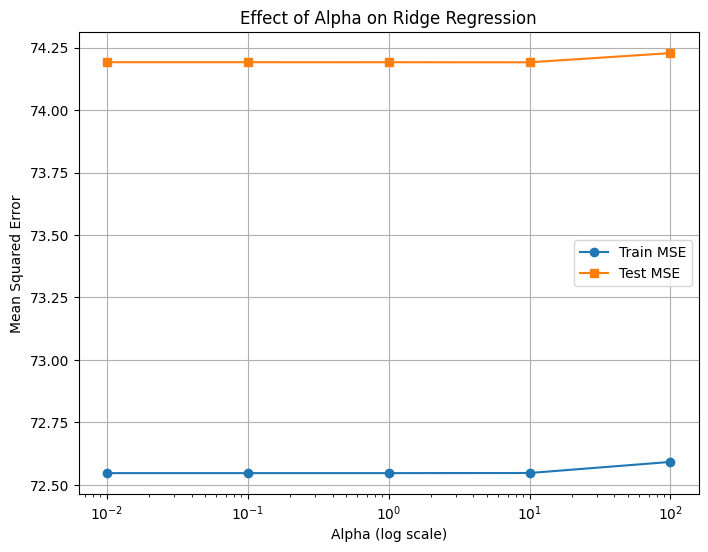

Best alpha: 10
Train MSE: 72.54760217347035
Test MSE: 74.1910501358141


In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv("DSAA2011-LA04-data.csv")

# Step 3: Data preprocessing
# Select feature and target variable
X = data["Humidity"].values.reshape(-1, 1)  # Input feature: Humidity
y = data["Apparent Temperature (C)"].values  # Target variable: Apparent Temperature (C)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Ridge regression model
alphas = [0.01, 0.1, 1, 10, 100]  # Different regularization parameters
mse_train = []
mse_test = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)  # Train the model
    y_train_pred = ridge.predict(X_train)  # Predictions for the training set
    y_test_pred = ridge.predict(X_test)  # Predictions for the testing set
    
    # Calculate mean squared error
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

# Step 6: Visualize the results
plt.figure(figsize=(8, 6))
plt.plot(alphas, mse_train, label="Train MSE", marker='o')
plt.plot(alphas, mse_test, label="Test MSE", marker='s')
plt.xscale("log")  # Use a logarithmic scale for alpha
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean Squared Error")
plt.title("Effect of Alpha on Ridge Regression")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Print the best results
best_alpha = alphas[np.argmin(mse_test)]
print(f"Best alpha: {best_alpha}")
print(f"Train MSE: {mse_train[np.argmin(mse_test)]}")
print(f"Test MSE: {mse_test[np.argmin(mse_test)]}")